In [1]:
%matplotlib notebook

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import moment
from scipy.optimize import curve_fit

#This program is used to calculate a single ideal chain and then plots the result
def constructfreelyjointedchainforplotting(alpha,beta,Na,Nb):
    Ntot = Na + Nb
    a_order = np.zeros(Ntot)
    a_order[np.argsort(np.random.rand(Ntot))[0:Na]] = 1 #Randomly assign a monomers to value of 1, b monomers to value of 0
    
    la = 2*np.sin(alpha/2* np.pi / 180.)
    lb = 2*np.sin(beta/2* np.pi / 180.)

    angles = np.random.rand(2,Ntot)*np.pi #Determine the effective polar and azimuthal angle of each monomer, with respect to universal coordinate system (without loss of generality)
    angles[0,:] = angles[0,:]*2 #Polar range is [0,2pi)
    radii = [a_order*(la-lb)+lb] #Calculate the effective radii of each monomer addition from the previous node
    
    coords = np.vstack(([np.cumsum(radii*np.sin(angles[0,:])*np.cos(angles[1,:]))],[np.cumsum(radii*np.sin(angles[0,:])*np.sin(angles[1,:]))],[np.cumsum(radii*np.cos(angles[0,:]))])) #Calculate the position of each end node in Cartesian coordinates
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(np.append([0],coords[0,:]),np.append([0],coords[1,:]),np.append([0],coords[2,:]))
    corder=['r' if a_order[i] == 1 else 'b' for i in range(Ntot)]
    ax.scatter3D(coords[0,:],coords[1,:],coords[2,:],c=corder)
    ax.set_xlabel('x (bond lengths)', fontsize=10)
    ax.set_ylabel('y (bond lengths)', fontsize=10)
    ax.set_zlabel('z (bond lengths)', fontsize=10)
    print('||\u0393|| = ',np.sqrt(coords[0,-1]**2+coords[1,-1]**2+coords[2,-1]**2))

#This program is used to calculate Niter ideal chains and returns an array of the end-to-end distances
def calculatefreelyjointedchainendtoenddistribution(alpha,beta,Na,Nb,Niter):
    Ntot = Na + Nb
    a_order = np.zeros((Ntot,Niter))
    for i in range(Niter):
        a_order[np.argsort(np.random.rand(Ntot))[0:Na],i] = 1 #Randomly assign a monomers to value of 1, b monomers to value of 0
    
    la = 2*np.sin(alpha/2* np.pi / 180.)
    lb = 2*np.sin(beta/2* np.pi / 180.)

    angles = np.random.rand(2,Ntot,Niter)*np.pi #Determine the effective polar and azimuthal angle of each monomer, with respect to universal coordinate system (without loss of generality)
    angles[0,:,:] = angles[0,:,:]*2 #Polar range is [0,2pi)
    radii = [a_order*(la-lb)+lb] #Calculate the effective radii of each monomer addition from the previous node
    
    endtoenddistances = np.sqrt((np.sum(radii*np.sin(angles[0,:,:])*np.cos(angles[1,:,:]),axis=1))**2+(np.sum(radii*np.sin(angles[0,:,:])*np.sin(angles[1,:,:]),axis=1))**2+(np.sum(radii*np.cos(angles[0,:,:]),axis=1))**2) #Calculate the position of each end node in Cartesian coordinates
    
    return endtoenddistances

# The following cell can be edited to construct and plot different ideal chain polymers

<IPython.core.display.Javascript object>


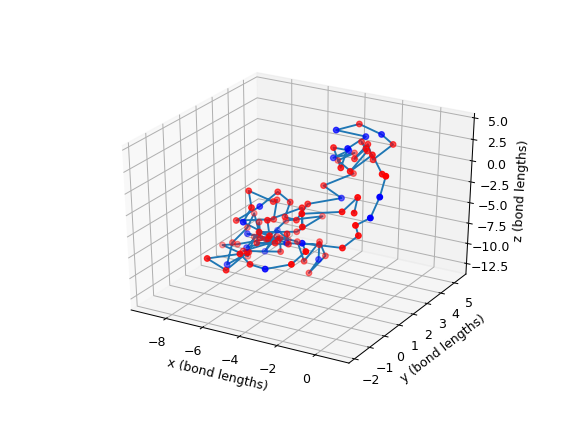

||Γ|| =  7.44780897699862


In [2]:
alpha = 110
beta = 128
Na = 80
Nb = 20

constructfreelyjointedchainforplotting(alpha,beta,Na,Nb)

# The following cell can be edited to calculate distributions for the ideal chain

<IPython.core.display.Javascript object>


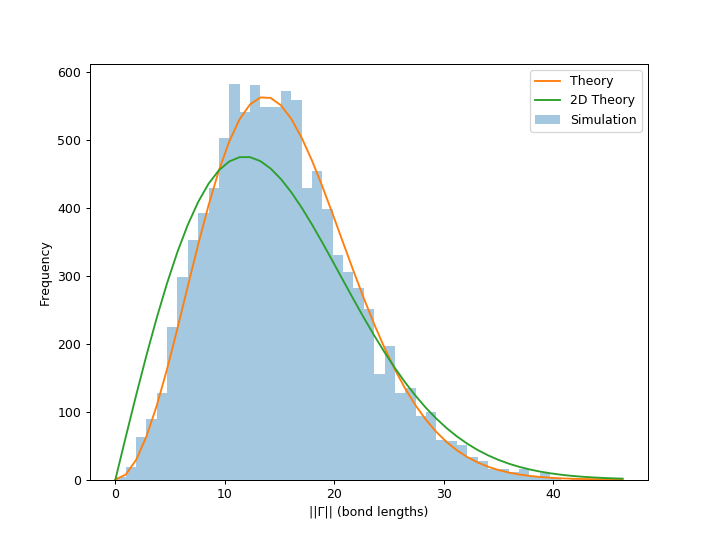

<||Γ||> = 15.23302755175259
<||Γ||^2>^1/2 = 16.62712433565651
<(Δ||Γ||)^2>^1/2 = 6.664543141200858


In [3]:
Niter = 10000
Na = 80
Nb = 20

## Editing the following code may break things ##

endtoenddistances = calculatefreelyjointedchainendtoenddistribution(alpha,beta,Na,Nb,Niter)


f=plt.figure(figsize=(8, 6), dpi=100)
x = np.linspace(0,np.max(endtoenddistances)+1)
sns.distplot(endtoenddistances,bins=x,label='Simulation',kde=False)

la = 2*np.sin(alpha/2* np.pi / 180.)
lb = 2*np.sin(beta/2* np.pi / 180.)

plt.plot(x,Niter*(np.max(endtoenddistances)+1)/50*(3/(2*np.pi*(Na*la**2+Nb*lb**2)))**1.5*np.exp(-3*x**2/(2*(Na*la**2+Nb*lb**2)))*4*np.pi*x**2,label='Theory')
plt.plot(x,Niter*(np.max(endtoenddistances)+1)/50*(2*x/((Na*la**2+Nb*lb**2)))*np.exp(-x**2/((Na*la**2+Nb*lb**2))),label='2D Theory')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('||\u0393|| (bond lengths)')
plt.show()

print('<||\u0393||> =',np.mean(endtoenddistances))
print('<||\u0393||^2>^1/2 =',np.mean(endtoenddistances**2)**0.5)
print('<(\u0394||\u0393||)^2>^1/2 =',moment(endtoenddistances[0,:],moment=2)**0.5)

In [4]:
#This program constructs a single freely rotating chain and plots it
def constructfreelyrotatingchainforplotting(alpha,beta,Na,Nb,la,lb):
    Ntot = Na + Nb
    a_order = np.zeros(Ntot)
    a_order[np.argsort(np.random.rand(Ntot))[0:Na]] = 1 #Randomly assign a monomers to value of 1, b monomers to value of 0
    
    radii = a_order*(la-lb)+lb
    
    fixedangles = (a_order[0:-1]+a_order[1:])/2*(alpha-beta)+beta #Taking into account that a-a, a-b, and (a-b or b-a) have 3 different bond angles (assuming a-b and b-a are just average of the two, naive but can be easily corrected)
    
    rotationangles = np.random.rand(Ntot)*360 #Determine the effective polar about the cone defined by hindered rotation
    coords = np.zeros((3,Ntot+1)) #One more than Ntot here to allow itterative process to include origin
    coords[:,0] = [0,0,0] #Start of first monomer at origin
    coords[:,1] = [1,1,1]/np.linalg.norm([1,1,1])*radii[0] #First monomer points in positive x,y,z direction without loss of generality
    for i in range(1,Ntot):
        r1 = coords[:,i] - coords[:,i-1] 
        v = [-r1[1],r1[0],0]
        w = [-r1[0]*r1[2],-r1[1]*r1[2],r1[0]**2+r1[1]**2]
        
        r1unit = r1/np.linalg.norm(r1)
        vunit = v/np.linalg.norm(v)
        wunit = w/np.linalg.norm(w)
        coords[:,i+1] = coords[:,i]+radii[i]*np.cos(fixedangles[i-1]*np.pi/180.)*r1unit + \
            radii[i]*np.sin(fixedangles[i-1]*np.pi/180.)*np.sin(rotationangles[i]*np.pi/180.)*vunit + \
            radii[i]*np.sin(fixedangles[i-1]*np.pi/180.)*np.cos(rotationangles[i]*np.pi/180.)*wunit
            
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    corder=['r' if a_order[i] == 1 else 'b' for i in range(Ntot)]
    ax.plot3D(coords[0,:],coords[1,:],coords[2,:])
    ax.set_xlabel('x (bond lengths)', fontsize=10)
    ax.set_ylabel('y (bond lengths)', fontsize=10)
    ax.set_zlabel('z (bond lengths)', fontsize=10)
    ax.scatter3D(coords[0,1:],coords[1,1:],coords[2,1:],c=corder)
    print('||\u0393|| = ',np.linalg.norm(coords[:,-1]))
    Naa = 1/(Na+Nb)*Na**2
    Nbb = 1/(Na+Nb)*Na**2-2*Na+Na+Nb
    Nab = -2/(Na+Nb)*Na**2+2*Na
    print('Theory =',np.sqrt(Na*la**2+Nb*lb**2+2*Naa*la**2*(1+np.cos(alpha*np.pi/180.))*np.cos(alpha*np.pi/180.)+2*Nbb*lb**2*(1+np.cos(beta*np.pi/180.))*np.cos(beta*np.pi/180.)+2*Nab*la*lb*(1+np.cos((beta+alpha)/2*np.pi/180.))*np.cos((beta+alpha)/2*np.pi/180.)))


# The following cell can be edited to construct and plot different freely rotating chain polymers

<IPython.core.display.Javascript object>


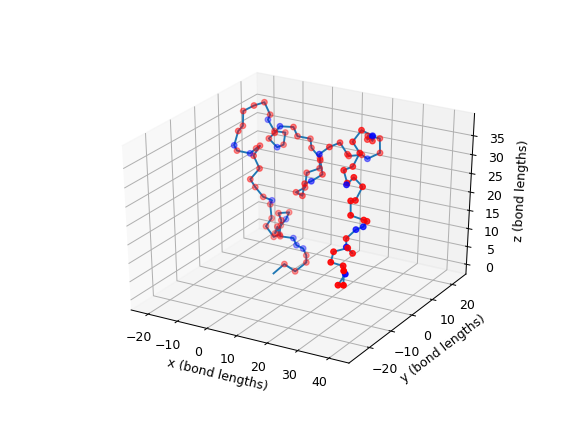

||Γ|| =  52.57346323121633
Theory = 49.735116322047816


In [5]:
alpha = 70.5
beta = 38 #This is redefining alpha and beta, now these are the angles using for freely rotating chain, not calculating monomer size

la = 3.7 
lb = 2.1 #Lengths are now taken from literature as the effective (ideal) bond length for PLLA and PMMA, respectively

Na = 80
Nb = 20
Niter = 1000

constructfreelyrotatingchainforplotting(alpha,beta,Na,Nb,la,lb)

In [6]:
#This program is used to construct multiple freely rotating chains and returns the end-to-end distances
def constructfreelyrotatingchainendtoenddistribution(alpha,beta,Na,Nb,la,lb,Niter):
    Ntot = Na + Nb
    endtoenddistances = np.zeros(Niter)
    
    for j in range(Niter):
        a_order = np.zeros(Ntot)
        a_order[np.argsort(np.random.rand(Ntot))[0:Na]] = 1 #Randomly assign a monomers to value of 1, b monomers to value of 0

        radii = a_order*(la-lb)+lb
        fixedangles = (a_order[0:-1]+a_order[1:])/2*(alpha-beta)+beta #Taking into account that a-a, a-b, and (a-b or b-a) have 3 different bond angles (assuming a-b and b-a are just average of the two, naive but can be easily corrected)
        rotationangles = np.random.rand(Ntot)*360 #Determine the effective polar about the cone defined by hindered rotation
        coords = np.zeros((3,Ntot+1)) #One more than Ntot here to allow itterative process to include origin
        coords[:,0] = [0,0,0] #Start of first monomer at origin
        coords[:,1] = [1,1,1]/np.linalg.norm([1,1,1])*radii[0] #First monomer points in positive x,y,z direction without loss of generality
        for i in range(1,Ntot):
            r1 = coords[:,i] - coords[:,i-1] 
            v = [-r1[1],r1[0],0]
            w = [-r1[0]*r1[2],-r1[1]*r1[2],r1[0]**2+r1[1]**2]

            r1unit = r1/np.linalg.norm(r1)
            vunit = v/np.linalg.norm(v)
            wunit = w/np.linalg.norm(w)
            coords[:,i+1] = coords[:,i]+radii[i]*np.cos(fixedangles[i-1]*np.pi/180.)*r1unit + \
                radii[i]*np.sin(fixedangles[i-1]*np.pi/180.)*np.sin(rotationangles[i]*np.pi/180.)*vunit + \
                radii[i]*np.sin(fixedangles[i-1]*np.pi/180.)*np.cos(rotationangles[i]*np.pi/180.)*wunit

        endtoenddistances[j] = np.linalg.norm(coords[:,-1])
    return endtoenddistances
def frcdistfitter(lengths,a,b):
    return lengths**2*a*np.exp(-lengths**2*b)

# The following cell can be edited to calculate distributions for the freely rotating chain

<IPython.core.display.Javascript object>


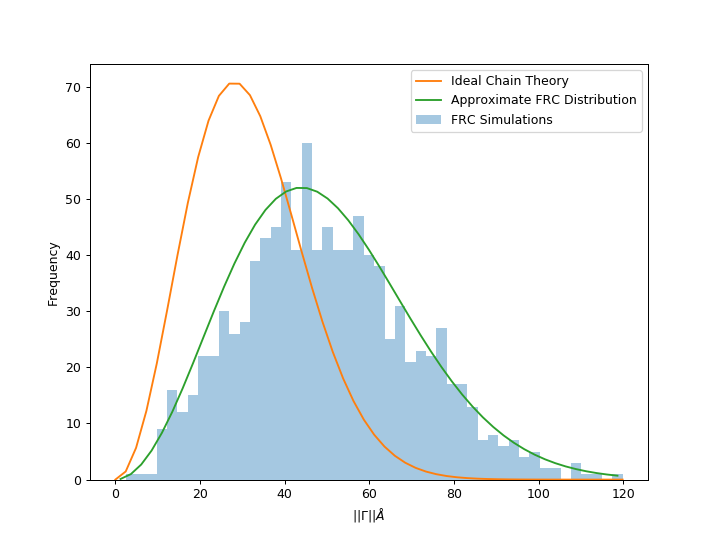

<||Γ||> = 50.23613277934613
<||Γ||^2>^1/2 = 54.1624261893736
Theory = 53.77168686924268
<(Δ||Γ||)^2>^1/2 = 20.24597179923079


In [7]:
alpha = 70.5
beta = 38 #This is redefining alpha and beta, now these are the angles using for freely rotating chain, not calculating monomer size

la = 3.7 
lb = 2.1 #Lengths are now taken from literature as the effective (ideal) bond length for PLLA and PMMA, respectively

Na = 80
Nb = 20
Niter = 1000

## Editing the following code may break things ##

distances = constructfreelyrotatingchainendtoenddistribution(alpha,beta,Na,Nb,la,lb,Niter)

f=plt.figure(figsize=(8, 6), dpi=100)
x = np.linspace(0,np.max(distances)+1)
xmean=(x[0:-1]+x[1:])/2
Naa = 1/(Na+Nb)*Na**2
Nbb = 1/(Na+Nb)*Na**2-2*Na+Na+Nb
Nab = -2/(Na+Nb)*Na**2+2*Na
rmsval = np.sqrt(Na*la**2+Nb*lb**2+2*Naa*la**2/(1-np.cos(alpha*np.pi/180.))*np.cos(alpha*np.pi/180.)+2*Nbb*lb**2/(1-np.cos(beta*np.pi/180.))*np.cos(beta*np.pi/180.)+2*Nab*la*lb/(1-np.cos((beta+alpha)/2*np.pi/180.))*np.cos((beta+alpha)/2*np.pi/180.))
sns.distplot(distances,bins=x,label='FRC Simulations',kde=False)
plt.plot(x,Niter*(np.max(distances)+1)/50*(3/(2*np.pi*(Na*la**2+Nb*lb**2)))**1.5*np.exp(-3*x**2/(2*(Na*la**2+Nb*lb**2)))*4*np.pi*x**2,label='Ideal Chain Theory')
plt.plot(xmean,frcdistfitter(xmean,Niter/(3/2*np.pi*rmsval**2)**1,3/2*rmsval**(-2)),label='Approximate FRC Distribution')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel(r'$||\Gamma|| \AA$')
plt.show()
print('<||\u0393||> =',np.mean(distances))
print('<||\u0393||^2>^1/2 =',np.mean(distances**2)**0.5)
print('Theory =',rmsval)
print('<(\u0394||\u0393||)^2>^1/2 =',moment(distances,moment=2)**0.5)

# The following cell can be edited to calculate root-mean-square chain length values for the freely rotating chain

<IPython.core.display.Javascript object>


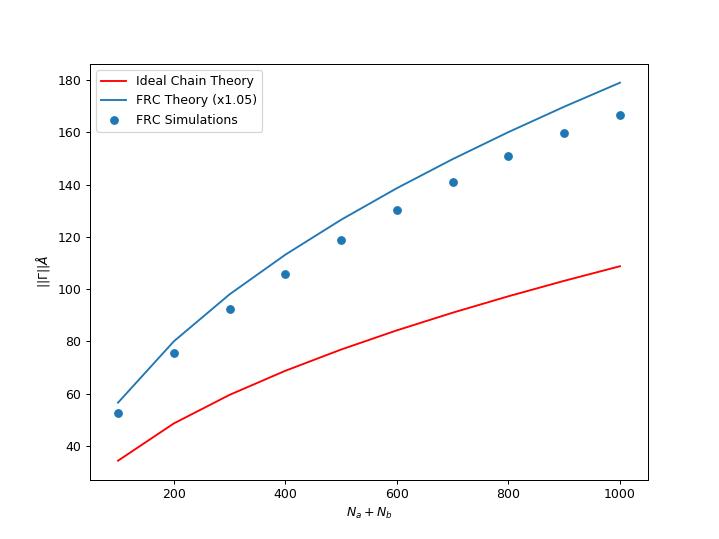

Text(0, 0.5, '$||\\Gamma|| \\AA$')

In [8]:
alpha = 70.5
beta = 38

la = 3.7 
lb = 2.1

Niter = 1000
Ntots = np.linspace(100,1000,10)
Nas = Ntots*0.8

## Editing the following code may cause issues

rmsvals = np.zeros(10)
rmstheory = np.zeros(10)
fjctheory = np.zeros(10)
for l in range(10):
    Ntot = np.int_(Ntots[l])
    Na = np.int_(Nas[l])
    Nb = Ntot - Na
    
    distances = constructfreelyrotatingchainendtoenddistribution(alpha,beta,Na,Nb,la,lb,Niter)
    rmsvals[l] = np.mean(distances**2)**0.5
    Naa = 1/(Na+Nb)*Na**2
    Nbb = 1/(Na+Nb)*Na**2-2*Na+Na+Nb
    Nab = -2/(Na+Nb)*Na**2+2*Na
    rmstheory[l] = 1/.95*np.sqrt(Na*la**2+Nb*lb**2+2*Naa*la**2/(1-np.cos(alpha*np.pi/180.))*np.cos(alpha*np.pi/180.)+2*Nbb*lb**2/(1-np.cos(beta*np.pi/180.))*np.cos(beta*np.pi/180.)+2*Nab*la*lb/(1-np.cos((beta+alpha)/2*np.pi/180.))*np.cos((beta+alpha)/2*np.pi/180.))
    fjctheory[l] = (Na*la**2+Nb*lb**2)**0.5
f=plt.figure(figsize=(8, 6), dpi=100)
plt.plot(Ntots,fjctheory,c='r',label='Ideal Chain Theory')
plt.plot(Ntots,rmstheory,label='FRC Theory (x1.05)')
plt.scatter(Ntots,rmsvals,label = 'FRC Simulations')
plt.legend()
plt.xlabel(r'$N_a + N_b$')
plt.ylabel(r'$||\Gamma|| \AA$')

# The following cell can be edited to calculate root-mean-square chain length values for the 5-mer freely rotating chain

<IPython.core.display.Javascript object>


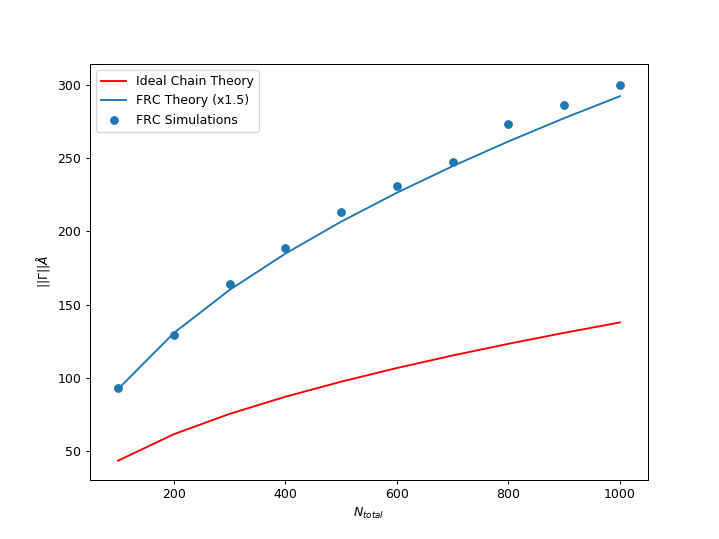

Text(0, 0.5, '$||\\Gamma|| \\AA$')

In [9]:
a = 70.5
b = 38
c = 20
d = 45
e = 60

la = 3.7 
lb = 2.1
lc = 4
ld = 5
le = 6


Niter = 1000
Ntots = np.linspace(100,1000,10)
Nas = Ntots*0.2
Nbs = Ntots*0.2
Ncs = Ntots*0.2
Nds = Ntots*0.2
Nes = Ntots*0.2

## Editing after this point may cause issues
#This code is used to create multiple 5-mer freely rotating chains to return the end-to-end distributions
def construct5merfreelyrotatingchainendtoenddistribution(a,b,c,d,e,Na,Nb,Nc,Nd,Ne,la,lb,lc,ld,le,Niter):
    Ntot = Na + Nb + Nc + Nd + Ne
    a_order = np.zeros(Ntot)
    endtoenddistances = np.zeros(Niter)
    
    for j in range(Niter):
        randvals = np.argsort(np.random.rand(Ntot))
        radii = np.zeros(Ntot)
        bondangles = np.zeros(Ntot)
        radii[randvals[0:Na]] = la; radii[randvals[Na:Nb+Na]] = lb; radii[randvals[Na+Nb:Na+Nb+Nc]] = lc; radii[randvals[Na+Nb+Nc:Na+Nb+Nc+Nd]] = ld; radii[randvals[Na+Nb+Nc+Nd:]] = le;
        bondangles[randvals[0:Na]] = a; bondangles[randvals[Na:Nb+Na]] = b; bondangles[randvals[Na+Nb:Na+Nb+Nc]] = c; bondangles[randvals[Na+Nb+Nc:Na+Nb+Nc+Nd]] = d; bondangles[randvals[Na+Nb+Nc+Nd:]] = e;
        
        fixedangles = (bondangles[0:-1]+bondangles[1:])/2 #Taking the average of each connected monomer's bond angles
        rotationangles = np.random.rand(Ntot)*360 #Determine the effective polar about the cone defined by hindered rotation
        coords = np.zeros((3,Ntot+1)) #One more than Ntot here to allow itterative process to include origin
        coords[:,0] = [0,0,0] #Start of first monomer at origin
        coords[:,1] = [1,1,1]/np.linalg.norm([1,1,1])*radii[0] #First monomer points in positive x,y,z direction without loss of generality
        for i in range(1,Ntot):
            r1 = coords[:,i] - coords[:,i-1] 
            v = [-r1[1],r1[0],0]
            w = [-r1[0]*r1[2],-r1[1]*r1[2],r1[0]**2+r1[1]**2]

            r1unit = r1/np.linalg.norm(r1)
            vunit = v/np.linalg.norm(v)
            wunit = w/np.linalg.norm(w)
            coords[:,i+1] = coords[:,i]+radii[i]*np.cos(fixedangles[i-1]*np.pi/180.)*r1unit + \
                radii[i]*np.sin(fixedangles[i-1]*np.pi/180.)*np.sin(rotationangles[i]*np.pi/180.)*vunit + \
                radii[i]*np.sin(fixedangles[i-1]*np.pi/180.)*np.cos(rotationangles[i]*np.pi/180.)*wunit

        endtoenddistances[j] = np.linalg.norm(coords[:,-1])
    return endtoenddistances


rmsvals = np.zeros(10)
rmstheory = np.zeros(10)
fjctheory = np.zeros(10)
for l in range(10):
    Ntot = np.int_(Ntots[l])
    Na = np.int_(Nas[l])
    Nb = np.int_(Nbs[l])
    Nc = np.int_(Ncs[l])
    Nd = np.int_(Nds[l])
    Ne = np.int_(Nes[l])
    
    #Calculate li*lj, Nij, and thetaij values for each unique i-j monomer pairing
    lij = np.array([la*la, la*lb, la*lc, la*ld,la*le,lb*lb,lb*lc,lb*ld,lb*le,lc*lc,lc*ld,lc*le,ld*ld,ld*le,le*le])
    Nij = np.array([Na**2/Ntot,2*Na*Nb/Ntot,2*Na*Nc/Ntot,2*Na*Nd/Ntot,2*Na*Ne/Ntot,Nb**2/Ntot,2*Nb*Nc/Ntot,2*Nb*Nd/Ntot,2*Nb*Ne/Ntot,Nc**2/Ntot,2*Nc*Nd/Ntot,2*Nc*Ne/Ntot,Nd**2/Ntot,2*Nd*Ne/Ntot,Ne**2/Ntot])
    tij = np.array([a, (a+b)/2,(a+c)/2,(a+d)/2,(a+e)/2,b, (b+c)/2, (b+d)/2, (b+e)/2, c, (c+d)/2, (c+e)/2, d, (d+e)/2, e])

    
    distances = construct5merfreelyrotatingchainendtoenddistribution(a,b,c,d,e,Na,Nb,Nc,Nd,Ne,la,lb,lc,ld,le,Niter)
    rmsvals[l] = np.mean(distances**2)**0.5
    
    rmstheory[l] = np.sqrt((Na*la**2+Nb*lb**2+Nc*lc**2+Nd*ld**2+Ne*le**2)+np.sum(Nij*lij*(1+np.cos(tij*np.pi/180.))*np.cos(tij*np.pi/180.)))
    fjctheory[l] = (Na*la**2+Nb*lb**2+Nc*lc**2+Nd*ld**2+Ne*le**2)**0.5
    
    
f=plt.figure(figsize=(8, 6), dpi=100)
plt.plot(Ntots,fjctheory,c='r',label='Ideal Chain Theory')
plt.plot(Ntots,rmstheory*1.5,label='FRC Theory (x1.5)')
plt.scatter(Ntots,rmsvals,label = 'FRC Simulations')
plt.legend()
plt.xlabel(r'$N_{total}$')
plt.ylabel(r'$||\Gamma|| \AA$')
